In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

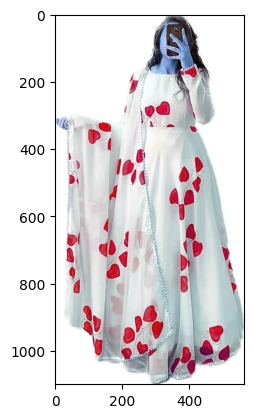

In [2]:
image=cv2.imread('/content/drive/MyDrive/cloth_rec/women fashion/Anarkali suit with a modern twist.jpg')
plt.imshow(image)

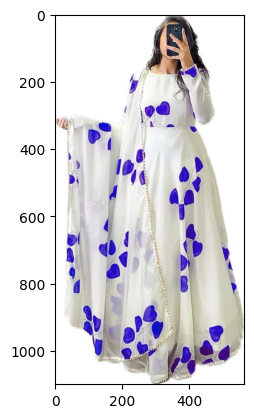

In [3]:
#convert to rgb formate
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [4]:
# extracting all the file in the folder
folder_path= '/content/drive/MyDrive/cloth_rec/women fashion'
files=os.listdir(folder_path)  # this will create a list of all files present in the folder
full_path=[os.path.join(folder_path,file) for file in files] #join the folder path and file path
full_path[:10]

['/content/drive/MyDrive/cloth_rec/women fashion/anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
 '/content/drive/MyDrive/cloth_rec/women fashion/Latest-Party-Wear-One-Piece-Gown-For-Women.webp',
 '/content/drive/MyDrive/cloth_rec/women fashion/Women-off-the-shoulder-sexy-embroidery-fashion-party-dress-1.png',
 '/content/drive/MyDrive/cloth_rec/women fashion/Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp',
 '/content/drive/MyDrive/cloth_rec/women fashion/Anarkali suit with fitted bodice with a high neckline.jpg',
 '/content/drive/MyDrive/cloth_rec/women fashion/Anarkali suit with a modern twist.jpg',
 '/content/drive/MyDrive/cloth_rec/women fashion/bright red kurta with an intricate patterned design.jpg',
 '/content/drive/MyDrive/cloth_rec/women fashion/black and white gingham checkered A-line dress with a flared skirt.jpg',
 '/content/drive/MyDrive/cloth

In [5]:
#function to show image
def show_image(path):
  image=cv2.imread(path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)

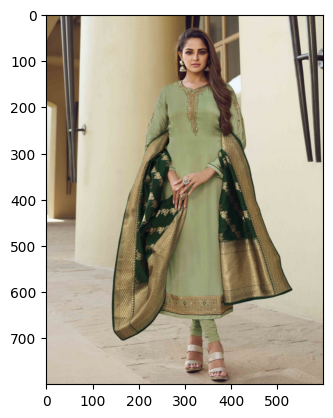

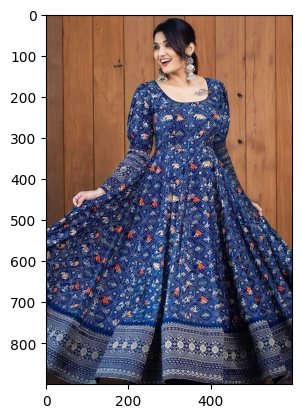

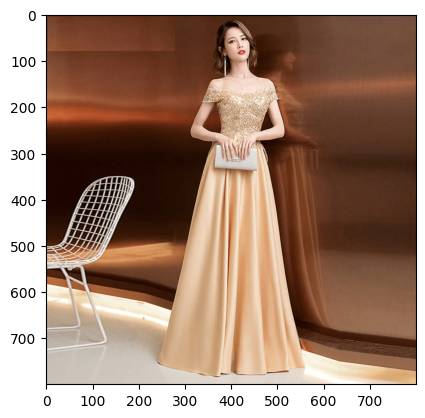

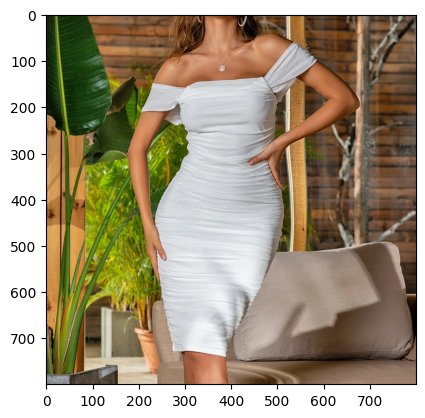

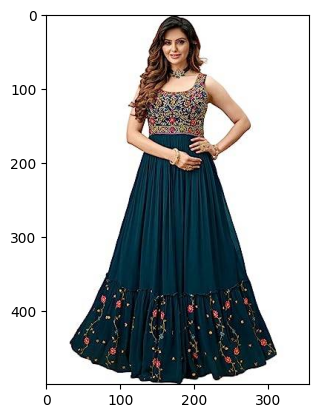

In [6]:
for i in range(5):
  show_image(full_path[i])
  plt.show()



In [7]:
# importing tensorflow libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Recommendation using VGG16

In [8]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
image=cv2.imread('/content/drive/MyDrive/cloth_rec/women fashion/Anarkali suit with a modern twist.jpg')
blob = cv2.dnn.blobFromImage(image, 1/255.0 , (224, 224), swapRB=True, crop=False)
blob.shape

(1, 3, 224, 224)

In [10]:
blob=blob.reshape(1,224,224,3)


In [11]:
blob.shape

(1, 224, 224, 3)

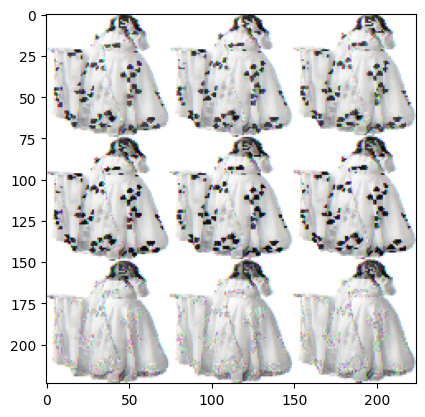

In [12]:
plt.imshow(blob[0])

In [13]:
def preprocess(file_path):
  image=cv2.imread(file_path)
  blob = cv2.dnn.blobFromImage(image, 1/255.0 , (224, 224), swapRB=True, crop=False)
  blob=blob.reshape(1,224,224,3)

  return preprocess_input(blob)

In [14]:

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

In [15]:
all_features = []
all_image_names = []

In [16]:
for image_path in full_path:
    preprocessed_img = preprocess(image_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(image_path)

1/1 [==============================] - 0s 467ms/step


In [17]:
all_features = np.array(all_features)


In [48]:
all_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
all_features.shape

(96, 25088)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
similarity= cosine_similarity(all_features)

In [20]:
similarity.shape

(96, 96)

In [67]:
similarity[0]

array([1.0000004 , 0.9994077 , 0.99877644, 0.9996245 , 0.9982081 ,
       0.998983  , 0.99926955, 0.99881804, 0.9990344 , 0.9993628 ,
       0.999371  , 0.99935395, 0.9995663 , 0.9986776 , 0.9990907 ,
       0.9992147 , 0.9989673 , 0.9949256 , 0.99829626, 0.99814343,
       0.99863917, 0.99954855, 0.9990348 , 0.99896646, 0.99929786,
       0.99938774, 0.99892515, 0.9996542 , 0.9989814 , 0.9990869 ,
       0.99908394, 0.9984966 , 0.99903333, 0.99850273, 0.9995607 ,
       0.9992218 , 0.9994866 , 0.9996298 , 0.99875164, 0.9989023 ,
       0.99928325, 0.9988584 , 0.99842614, 0.9994017 , 0.9994837 ,
       0.99950874, 0.9993859 , 0.9990214 , 0.99938226, 0.9992169 ,
       0.9993111 , 0.9989302 , 0.9996402 , 0.99953884, 0.9995335 ,
       0.99949175, 0.9993334 , 0.9987638 , 0.99891466, 0.9996715 ,
       0.99923074, 0.9989265 , 0.9994299 , 0.99915355, 0.9983679 ,
       0.99903387, 0.99893135, 0.99926627, 0.9993194 , 0.9995233 ,
       0.99957377, 0.99861455, 0.99941987, 0.9995508 , 0.99897

In [21]:
all_image_names= pd.DataFrame(all_image_names)

In [22]:
all_image_names.head()

,0
0,/content/drive/MyDrive/cloth_rec/women fashion...
1,/content/drive/MyDrive/cloth_rec/women fashion...
2,/content/drive/MyDrive/cloth_rec/women fashion...
3,/content/drive/MyDrive/cloth_rec/women fashion...
4,/content/drive/MyDrive/cloth_rec/women fashion...


In [23]:
all_image_names.columns=['image_path']

In [24]:
all_image_names.head()

,image_path
0,/content/drive/MyDrive/cloth_rec/women fashion...
1,/content/drive/MyDrive/cloth_rec/women fashion...
2,/content/drive/MyDrive/cloth_rec/women fashion...
3,/content/drive/MyDrive/cloth_rec/women fashion...
4,/content/drive/MyDrive/cloth_rec/women fashion...


In [25]:
t=all_image_names[all_image_names['image_path']==full_path[0]].index[0]

In [26]:
distances = similarity[t]
sorted_indices = np.argsort(distances)[::-1]

In [27]:
sorted_indices

array([ 0, 59, 27, 52, 37,  3, 70, 12, 34, 73, 21, 53, 54, 69, 45, 84, 55,
       36, 44, 88, 90, 62, 72, 94,  1, 43, 25, 46, 48, 10,  9, 11, 87, 75,
       85, 95, 76, 56, 81, 68, 50, 83, 24, 40,  6, 67, 82, 60, 35, 49, 15,
       89, 63, 78, 14, 29, 30, 91, 22,  8, 65, 32, 47,  5, 28, 74, 16, 23,
       77, 92, 66, 51, 61, 26, 58, 39, 41, 93,  7,  2, 57, 38, 13, 20, 86,
       71, 33, 31, 80, 42, 64, 18,  4, 19, 79, 17])

In [28]:
# this recommender system has one problem it will work only with the images present in our dataset
def dress_recommender(image_path,similarity=similarity,all_features=all_features,all_image_names=all_image_names):
  preprocessed_img = preprocess(image_path)
  features = extract_features(model, preprocessed_img)
  index=all_image_names[all_image_names['image_path']==image_path].index[0]
  distances = similarity[index]
  sorted_indices = np.argsort(distances)[::-1]
  show_image(image_path)
  plt.show()
  for i in range(1,6):
    recomended_image=all_image_names.iloc[sorted_indices[i]]['image_path']
    show_image(recomended_image)
    plt.show()



In [29]:
def Image(image_path):
  img=cv2.imread(image_path)
  image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return image_rgb

In [69]:
input_image_path=full_path[16]

In [31]:
# we solved the problem present in the earlier fuction
def recommender(image_path,all_features=all_features,all_image_names=all_image_names):
  preprocessed_img = preprocess(image_path)
  features = extract_features(model, preprocessed_img)
  features=features.reshape(1,-1)
  similarity=cosine_similarity(features,all_features)
  sorted_indices = np.argsort(similarity[0])[::-1]
  plt.figure(figsize=(15, 10))
  plt.subplot(1, 5 + 1, 1)
  plt.imshow(Image(image_path))
  plt.title("Input Image")
  plt.axis('off')
  for i in range(1,6):
    recomended_image=all_image_names.iloc[sorted_indices[i]]['image_path']
    plt.subplot(1, 5 + 1, i + 1)
    plt.imshow(Image(recomended_image))
    plt.title(f"Recommendation {i}")
    plt.axis('off')

1/1 [==============================] - 0s 494ms/step


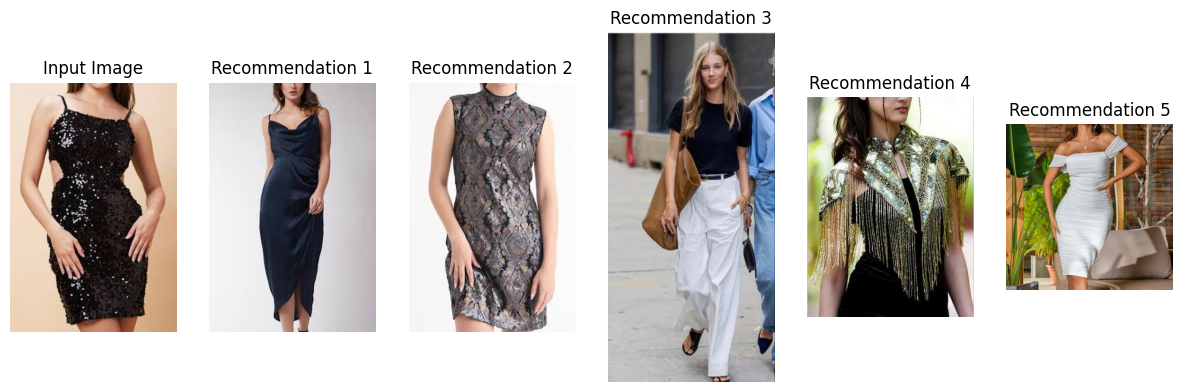

In [67]:
recommender(input_image_path)

# Recommendation using resnet

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [40]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False)
model_resnet = Model(inputs=base_model_resnet.input, outputs=base_model_resnet.output)

94765736/94765736 [==============================] - 1s 0us/step


In [41]:
all_features_resnet = []
all_image_names_resnet = []

In [56]:
preprocessed_img_resnet = preprocess(full_path[4])
features_resnet = extract_features(model_resnet, preprocessed_img_resnet)

1/1 [==============================] - 0s 434ms/step


100352

In [57]:
features_resnet.shape

(100352,)

In [43]:
for image_path in full_path:
    preprocessed_img_resnet = preprocess(image_path)
    features_resnet = extract_features(model_resnet, preprocessed_img_resnet)
    all_features_resnet.append(features_resnet)
    all_image_names_resnet.append(image_path)

1/1 [==============================] - 0s 192ms/step


In [50]:
all_image_names_resnet = pd.DataFrame(all_image_names_resnet)
all_image_names_resnet.columns = ['image_path']

In [51]:
all_image_names_resnet.head()

,image_path
0,/content/drive/MyDrive/cloth_rec/women fashion...
1,/content/drive/MyDrive/cloth_rec/women fashion...
2,/content/drive/MyDrive/cloth_rec/women fashion...
3,/content/drive/MyDrive/cloth_rec/women fashion...
4,/content/drive/MyDrive/cloth_rec/women fashion...


In [60]:
import numpy as np

# Find the maximum number of features across all images
max_features = max([features.shape[0] for features in all_features_resnet])

# Pad each feature vector with zeros to make it the same length
padded_features = []
for features in all_features_resnet:
    padded_features.append(np.pad(features, (0, max_features - features.shape[0]), 'constant'))

# Convert the list to a NumPy array
all_features_resnet = np.array(padded_features)

In [61]:
all_features_resnet.shape

(99, 100352)

In [64]:
def resnet_recommender(image_path,all_features=all_features_resnet,all_image_names=all_image_names_resnet):
  preprocessed_img = preprocess(image_path)
  features = extract_features(model_resnet, preprocessed_img)
  features=features.reshape(1,-1)
  similarity=cosine_similarity(features,all_features)
  sorted_indices = np.argsort(similarity[0])[::-1]
  plt.figure(figsize=(15, 10))
  plt.subplot(1, 5 + 1, 1)
  plt.imshow(Image(image_path))
  plt.title("Input Image")
  plt.axis('off')
  for i in range(1,6):
    recomended_image=all_image_names.iloc[sorted_indices[i]]['image_path']
    plt.subplot(1, 5 + 1, i + 1)
    plt.imshow(Image(recomended_image))
    plt.title(f"Recommendation {i}")
    plt.axis('off')

In [77]:
input_image_path=full_path[65]

1/1 [==============================] - 0s 307ms/step


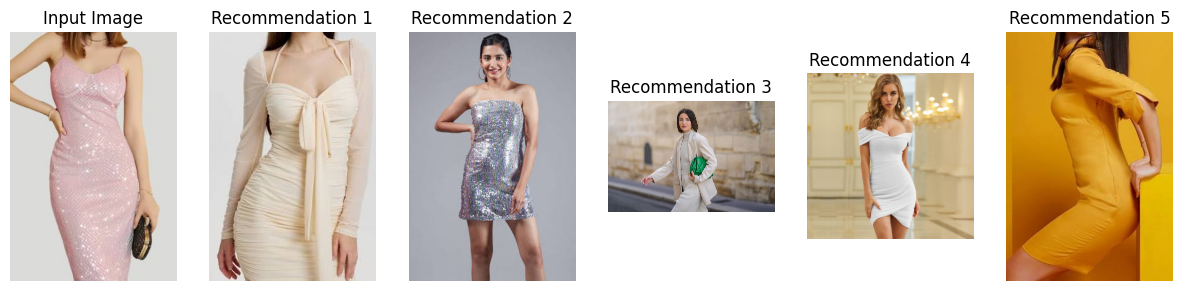

In [78]:
#resmet prediction
resnet_recommender(input_image_path)

1/1 [==============================] - 1s 840ms/step


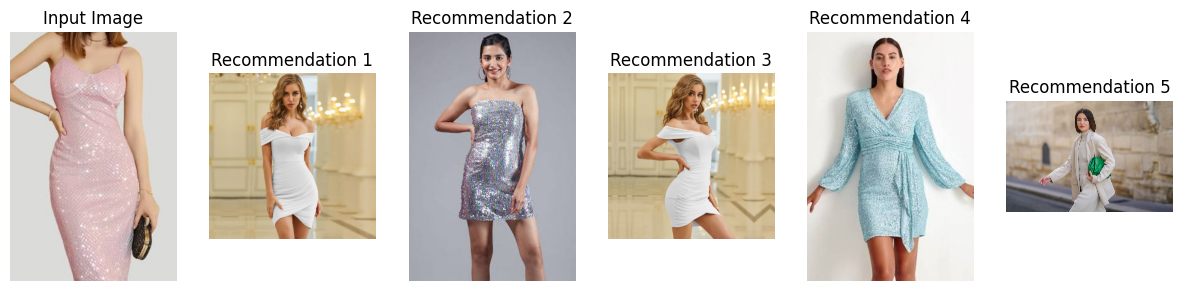

In [79]:
#VGG16 pridiction
recommender(input_image_path)